# Runge-Kutta Implementation

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define a function to integrate

In [17]:
def dfdx(x,f):
    return x**2 + x

# Define the integral of the function

In [18]:
def f_int(x,C):
    return (x**3)/3. + 0.5*x**2 + C

# Define the 2nd order Runge-Kutta method

In [19]:
def rk2_core(x_i,f_i,h,g):
    
    # advance f by a step h
    
    # half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    # full step
    f_ipo = f_i + h*g(x_ipoh, f_ipoh)
    
    return f_ipo

# Define a wrapper function for 2nd order Runge-Kutta

In [20]:
def rk2(dfdx,a,b,f_a,N):
    # dfdx is the derivate wrt x
    # a is lower bound
    # b is upper bound
    # f_a is the boundary condition at 'a'
    # N is the number of steps to take
    
    # define the steps
    x = np.linspace(a,b,N)
    
    # set the single step size
    h = x[1]-x[0]
    
    # create array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a  # the value of f at a
    
    # evolve function f along x
    for i in range(1,N):
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

# Define the 4th order Runge-Kutta method

In [21]:
def rk4_core(x_i,f_i,h,g):
    
    # Define x at 1/2 step
    x_ipoh = x_i + 0.5*h
    
    # Define x at 1 step
    x_ipo = x_i + h
    
    
    # Advance f by a step h
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 + 2*k_3 + k_4)/6.
    
    return f_ipo

# Define a wrapper function for 4th order Runge-Kutta

In [22]:
def rk4(dfdx,a,b,f_a,N):
    # dfdx is the derivate wrt x
    # a is lower bound
    # b is upper bound
    # f_a is the boundary condition at 'a'
    # N is the number of steps to take
    
    # define the steps
    x = np.linspace(a,b,N)
    
    # set the single step size
    h = x[1]-x[0]
    
    # create array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a  # the value of f at a
    
    # evolve function f along x
    for i in range(1,N):
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

# Perform the integration

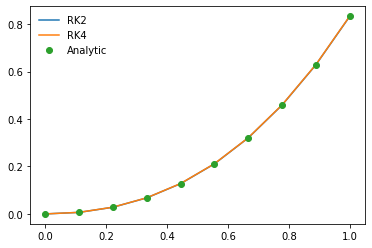

In [23]:
a = 0.0
b = 1.0
f_a = 0.0
N = 10

x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)

x = x_2.copy()

plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)